In [147]:
import pandas as pd
import numpy as np

In [148]:
from skimage.io import imread
from skimage import img_as_float
image = imread('parrots.jpg')

In [149]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as MSE

In [150]:
%matplotlib inline

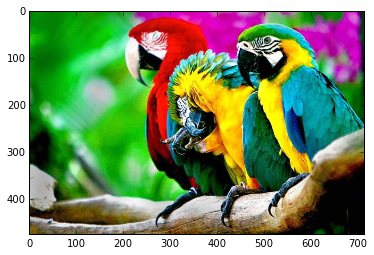

In [151]:
import pylab
pylab.imshow(image)

In [152]:
data = img_as_float(image)

In [153]:
data.shape

(474L, 713L, 3L)

In [154]:
d=pd.DataFrame(data.reshape(337962,3))

In [155]:
zmean = lambda x: x.mean()
zmed = lambda x: x.median()

In [157]:
for i in range(9,13):
    clf = KMeans(n_clusters=i, init='k-means++', random_state=241)
    clf.fit(d)
    d["cluster"]=clf.predict(d)
    d["mean_0"]=d[d.columns[0]]
    d["mean_1"]=d[d.columns[1]]
    d["mean_2"]=d[d.columns[2]]
    d["med_0"]=d[d.columns[0]]
    d["med_1"]=d[d.columns[1]]
    d["med_2"]=d[d.columns[2]]
    d[["mean_0","mean_1","mean_2"]] = d.groupby("cluster").transform(zmean)[["mean_0","mean_1","mean_2"]]
    d[["med_0","med_1","med_2"]] = d.groupby("cluster").transform(zmed)[["med_0","med_1","med_2"]]
    source=d[d.columns[:3]]
    median = d[d.columns[7:10]]
    mean = d[d.columns[4:7]]
    source.columns=['r','g','b']
    median.columns=['r','g','b']
    mean.columns=['r','g','b']
    mse_median=MSE(source,median)
    mse_mean=MSE(source,mean)
    print i, 20*np.log10(1)- 10*np.log10(mse_mean)
    print i, 20*np.log10(1)- 10*np.log10(mse_median)

9 16.6135097091
9 16.3654768474
10 17.5892409029
10 17.4007231163
11 18.7531214264
11 18.5930457523
12 20.3228103867
12 20.1321700233


In [137]:
20*np.log10(1)-10*np.log10(mse_mean)

18.484582121198464

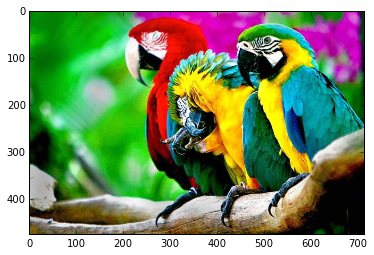

In [105]:
pylab.imshow(source.as_matrix().reshape(474,713,3))

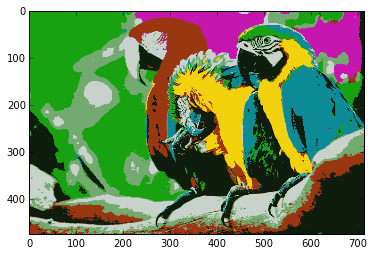

In [106]:
pylab.imshow(mean.as_matrix().reshape(474,713,3))

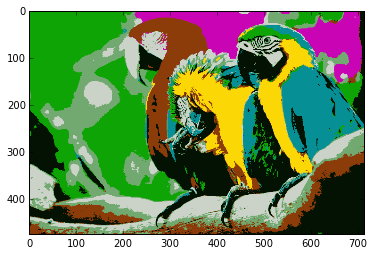

In [107]:
pylab.imshow(median.as_matrix().reshape(474,713,3))

In [50]:
grouped=d.groupby(['cluster'], sort=False)

In [51]:
grouped.agg({'mean_0' : np.mean
             'mean_1' : np.median})

SyntaxError: invalid syntax (<ipython-input-51-d48852b5ae3c>, line 2)

In [47]:
d.groupby(['cluster'], sort=False).mean()

,0,1,2,mean_0
cluster,,,,
7,0.095912,0.634966,0.068093,0.095912
2,0.452175,0.668088,0.441746,0.452175
4,0.775593,0.091530,0.689136,0.775593
1,0.787613,0.823017,0.795413,0.787613
6,0.606545,0.217095,0.069927,0.606545
0,0.055270,0.117558,0.052109,0.055270
5,0.050321,0.548908,0.592347,0.050321
3,0.952475,0.827348,0.047726,0.952475


In [40]:
del d_new

In [39]:
d_new[d.columns[:3]][d["cluster"]==0] = d[d.columns[:3]][d["cluster"]==0].median()

C:\Users\Rahmatulin\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Rahmatulin\Anaconda2\envs\dato-env\lib\site-packages\pandas\core\frame.py:2142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.ix._setitem_with_indexer(indexer, value)


ValueError: shape mismatch: value array of shape (69117,) could not be broadcast to indexing result of shape (69117,3)